In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
%matplotlib inline


In [2]:
!git clone 'https://github.com/sachinkavindaa/Machine-learning-with-Python'

Cloning into 'Machine-learning-with-Python'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 108 (delta 29), reused 104 (delta 25), pack-reused 0
Receiving objects: 100% (108/108), 554.73 KiB | 18.49 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [3]:
df = pd.read_csv('/content/Machine-learning-with-Python/ML/Diabetes/diabetes.csv')
df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 Check whether How many patients have diabetes


*   0 means doesn't have
*   1 means does have

Considerng given data we can see most of them do not have diabetes. 



Outcome
0    500
1    268
dtype: int64

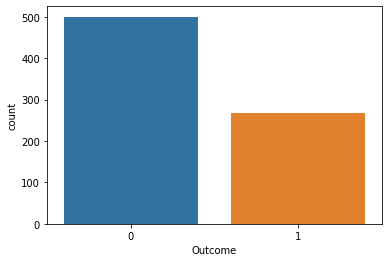

In [5]:
sns.countplot(x = 'Outcome',data = df)

df.groupby('Outcome').size()

Here you can see given plot describes whether she does not have diabetes or does have diabetes considering her Pregnancies level. 

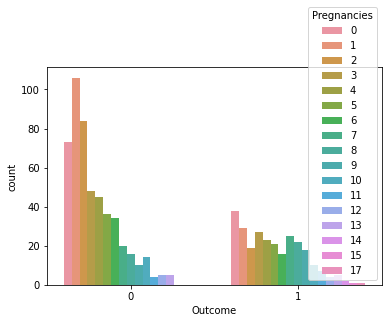

In [6]:
sns.countplot(x = 'Outcome', hue = 'Pregnancies',data = df)

This graph describes how many patients are their in relevent Pregnancies level. Since level_2 Pregnancies level shows much patients than levels.

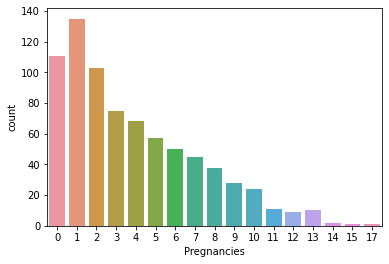

In [7]:
sns.countplot(x = 'Pregnancies',data = df)

Below two graphs describe distribution of age group among the all of data. We can see there are lot of patients in age 20 - 30. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


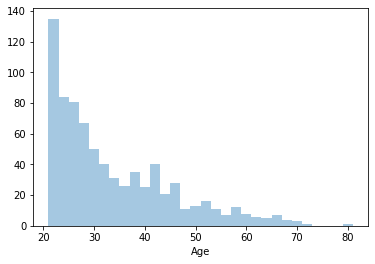

In [8]:
sns.distplot(df['Age'].dropna(),kde = False, bins =30)

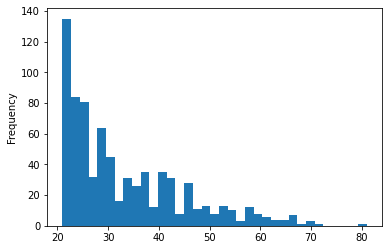

In [9]:
df['Age'].plot.hist(bins= 35)

Considering the given data set there are many of them represnting range in BMI 20 to 40. 

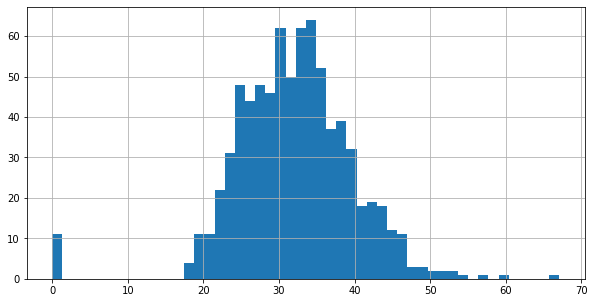

In [10]:
df['BMI'].hist(bins =50,figsize = (10,5))

This distributation says Pregnancies level and its relative age group.

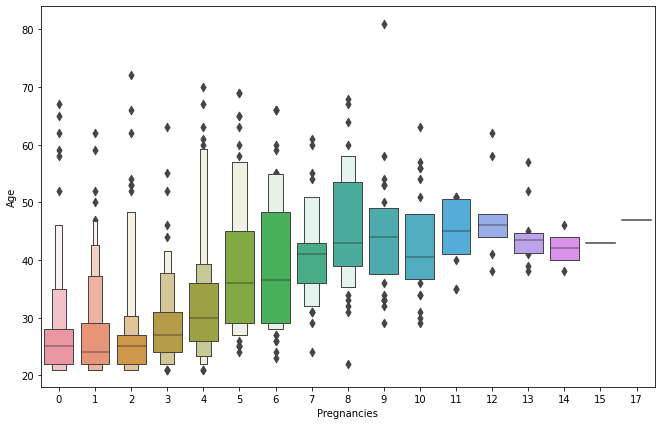

In [11]:
plt.figure(figsize=(11,7))
sns.boxenplot(x ='Pregnancies', y = 'Age',data = df)

In [12]:
print("Diabetes data set dimensions : {}".format(df.shape))

Diabetes data set dimensions : (768, 9)


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

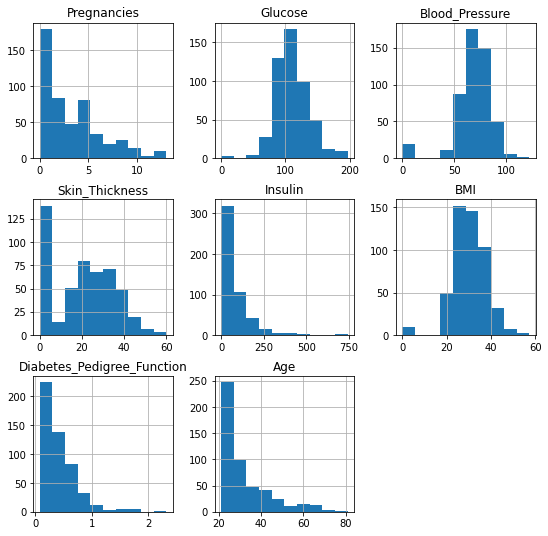

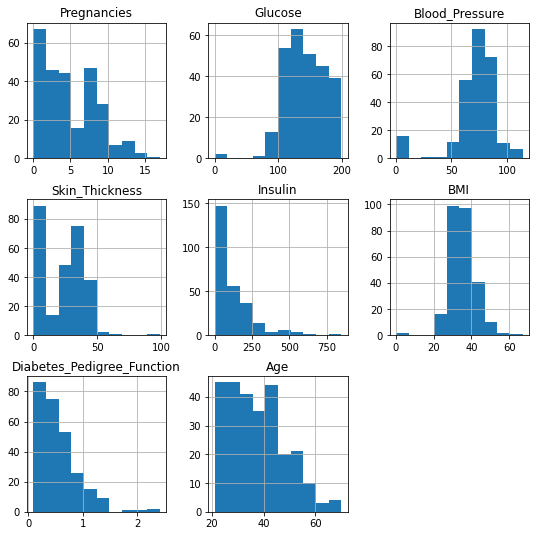

In [13]:
df.groupby('Outcome').hist(figsize=(9, 9))


In [14]:
df_mod = df[(df.Blood_Pressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
print(df_mod.shape)


(724, 9)


In [15]:
feature_names = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']
X = df_mod[feature_names]
y = df_mod.Outcome

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0)
reg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
pred = reg.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       120
           1       0.75      0.66      0.70        61

    accuracy                           0.81       181
   macro avg       0.80      0.77      0.78       181
weighted avg       0.81      0.81      0.81       181



With these two labelled sets (actual and predictions) we can create a confusion matrix that will summarize the results of testing the classifier.

Here you can see the classifier makes 147 accurate predictions and misses 34. Which means model trained well. 21 of 1 wrongly predicted as 0 and 40th 0 wrongly predicted as 1. 

In [21]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test,pred)

array([[107,  13],
       [ 21,  40]])

In [22]:
reg.score(X_test,y_test)

0.8121546961325967

In [23]:
reg.predict(X_test)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0])

In [24]:
pred_df = pd.DataFrame({'Actual_value' : y_test,'Predicted_value' : pred, 'Difference' : y_test-pred })
pred_df

,Actual_value,Predicted_value,Difference
259,1,1,0
82,0,0,0
92,0,0,0
283,1,1,0
108,0,0,0
...,...,...,...
370,1,1,0
119,0,0,0
766,1,0,1
721,0,0,0


In the given figure you will described variation between actual output and prediction output.For the clear determination we can get error with actual output and prediction output by difference coloumn. 

Difference means = Actual output - Prediction output

Orange color coloumn describes  0 output of the difference. In the data set we can see there are many of values converged to the zero which means actual output and prediction output are equal. 


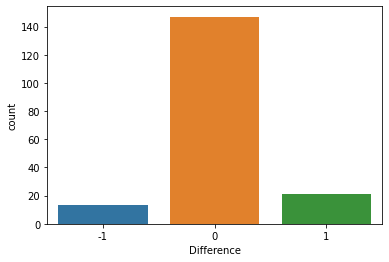

In [25]:
sns.countplot(x = 'Difference', data = pred_df)